In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

# Create data

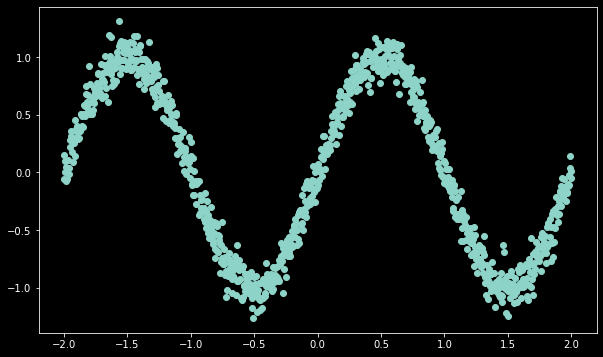

In [6]:
nPts = 1000

m = 0.5
b = 1

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

#y = m*x + b
#y = x**2
y = np.sin(2*np.pi*x/2)

y +=  + np.random.normal(0, 0.1, nPts)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.show()

# Modeling

### Train / test split

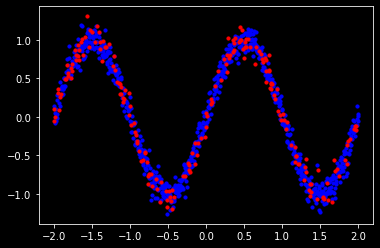

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_ext = np.linspace(-4, 4, nPts)

markersize = 10
plt.scatter(X_train[:,0], y_train, label='Training Data', c='b', s=markersize);
plt.scatter(X_test[:,0], y_test, label='Testing Data', c='r', s=markersize);

### Create and train models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1, weights='uniform'),
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    KNeighborsRegressor(n_neighbors=10, weights='uniform'),
    RandomForestRegressor(n_estimators=10, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    MLPRegressor(hidden_layer_sizes=(30,20,10), max_iter=1000, tol=0.00001, n_iter_no_change=10)
]

LinearRegression()
r2_train:   0.15593
r2_test:    0.093483
rmse_train: 0.66232
rmse_test:  0.67157


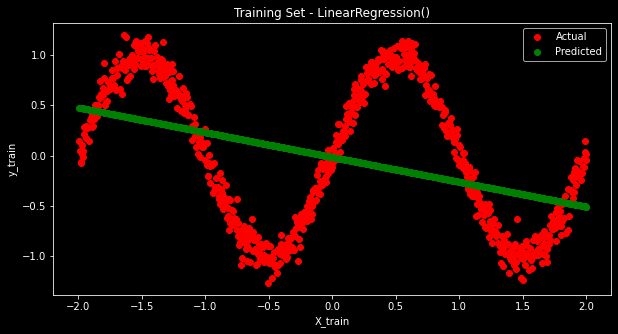

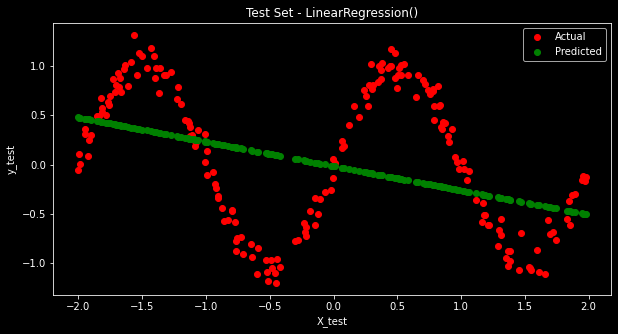

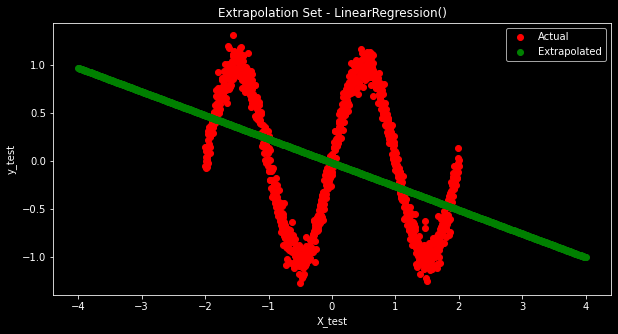


KNeighborsRegressor(n_neighbors=1)
r2_train:   1.0
r2_test:    0.96157
rmse_train: 0.0
rmse_test:  0.13827


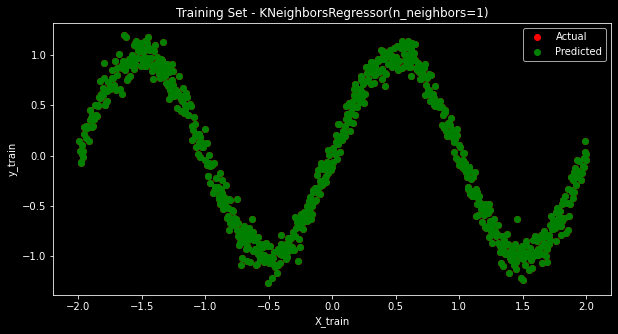

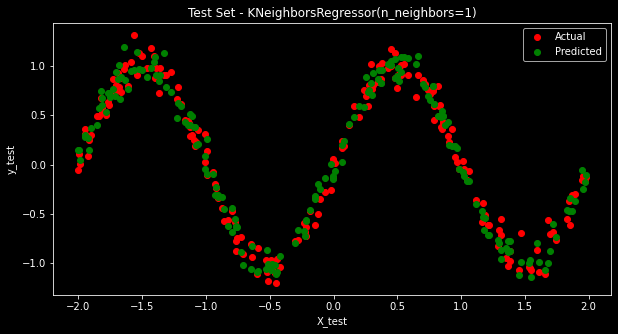

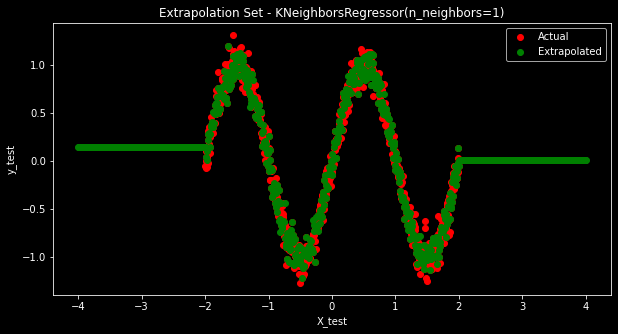


KNeighborsRegressor()
r2_train:   0.98442
r2_test:    0.97437
rmse_train: 0.089983
rmse_test:  0.11293


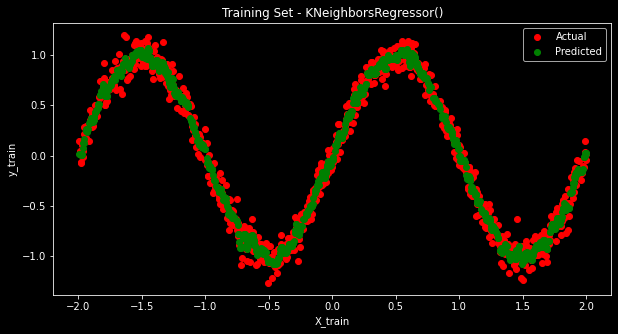

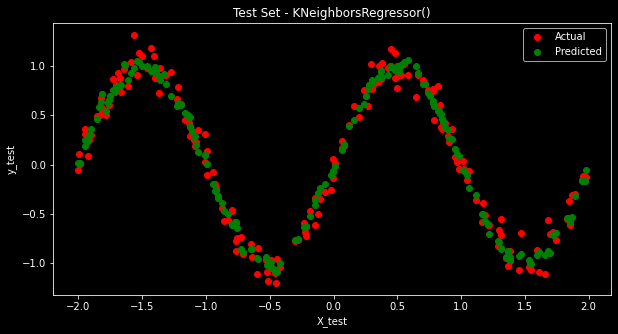

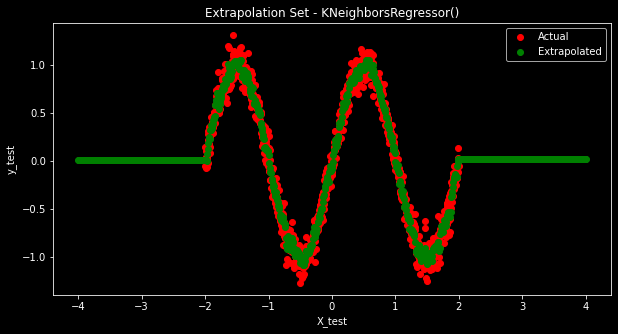


KNeighborsRegressor(n_neighbors=10)
r2_train:   0.98261
r2_test:    0.97576
rmse_train: 0.095071
rmse_test:  0.10981


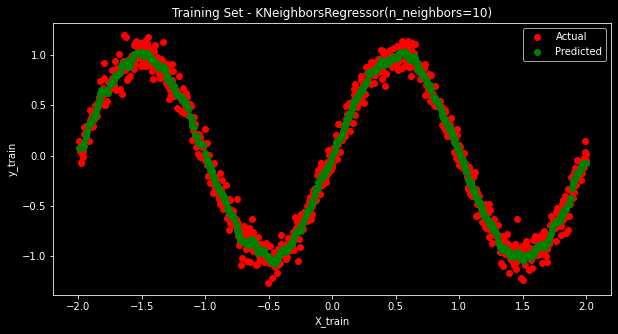

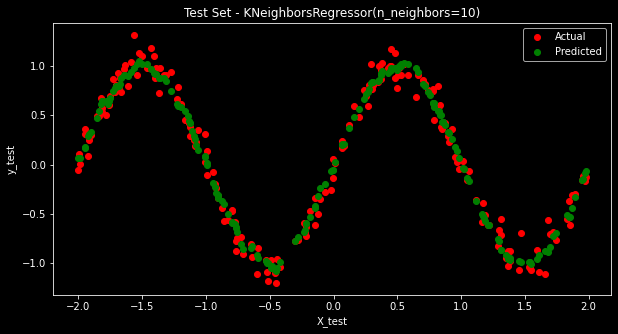

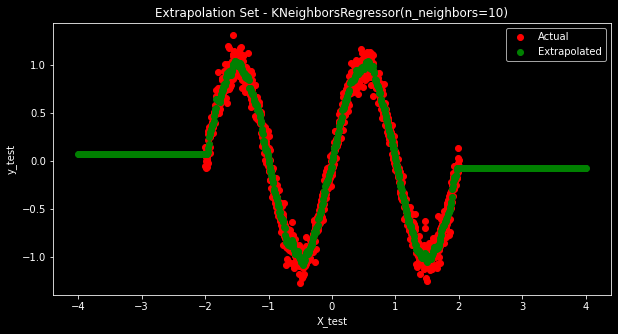


RandomForestRegressor(max_depth=5, n_estimators=10)
r2_train:   0.97213
r2_test:    0.9596
rmse_train: 0.12036
rmse_test:  0.14177


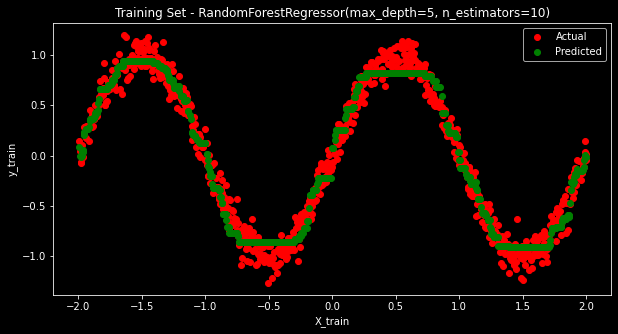

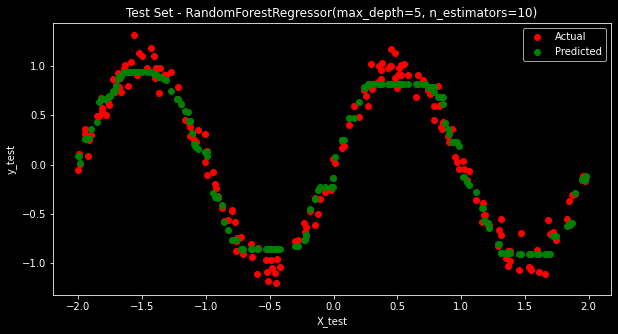

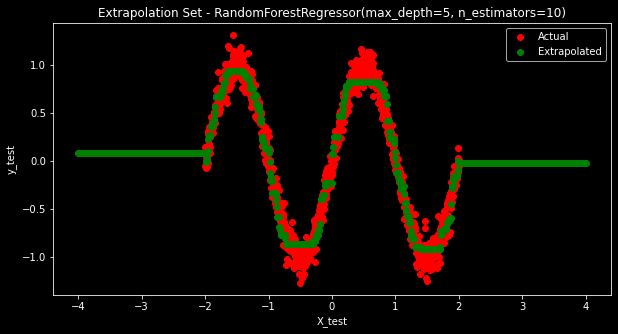


RandomForestRegressor(max_depth=10)
r2_train:   0.99252
r2_test:    0.972
rmse_train: 0.062346
rmse_test:  0.11804


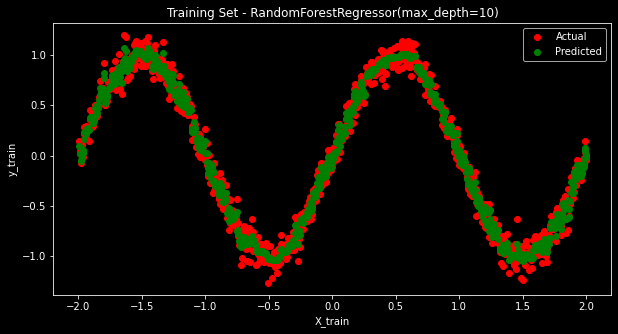

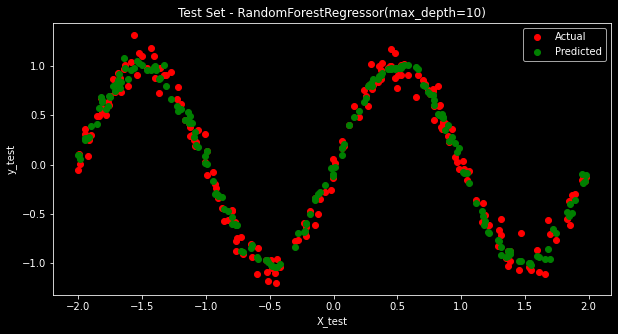

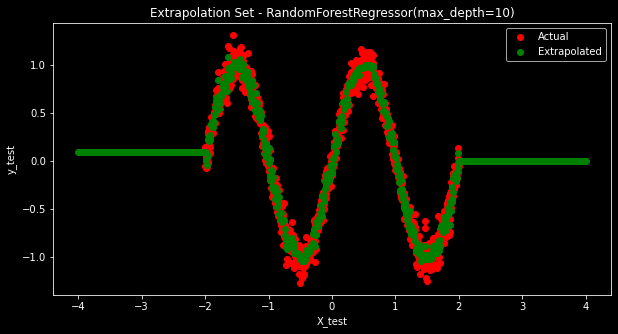


GradientBoostingRegressor(max_depth=2)
r2_train:   0.98449
r2_test:    0.9717
rmse_train: 0.08979
rmse_test:  0.11866


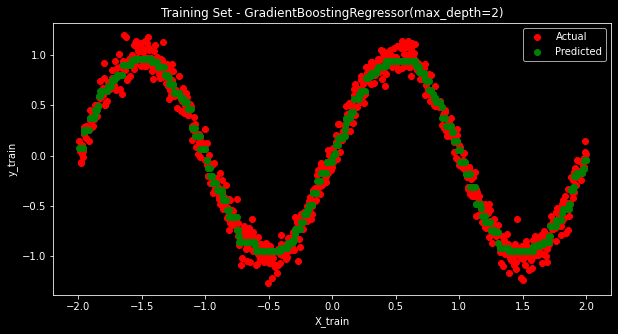

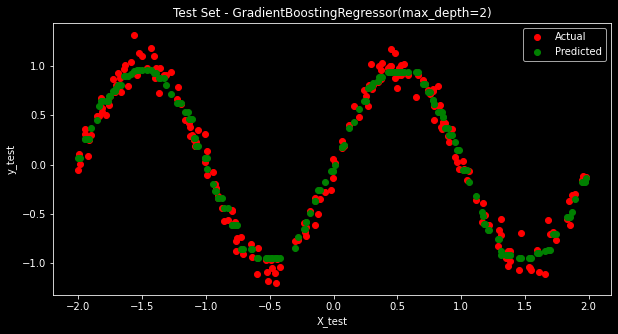

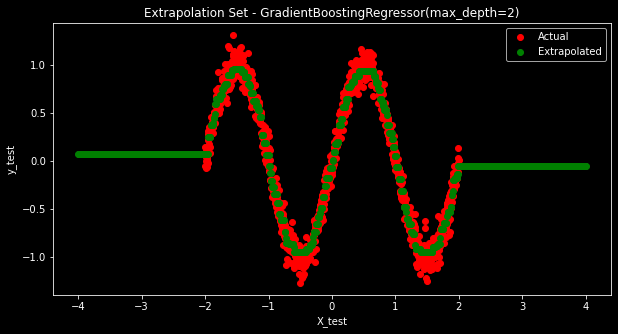


GradientBoostingRegressor(max_depth=5)
r2_train:   0.99196
r2_test:    0.97325
rmse_train: 0.064637
rmse_test:  0.11536


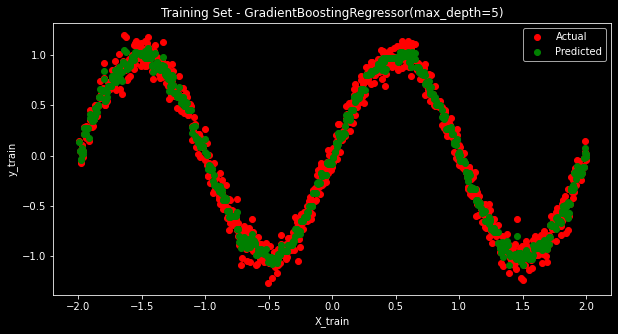

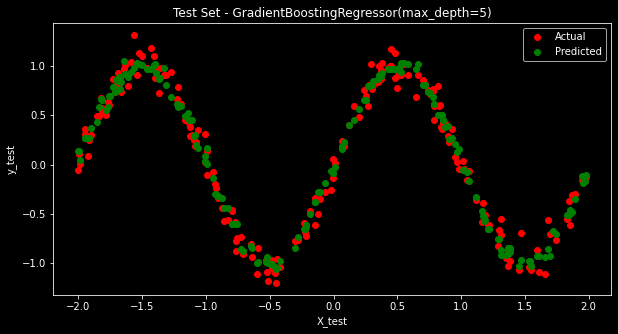

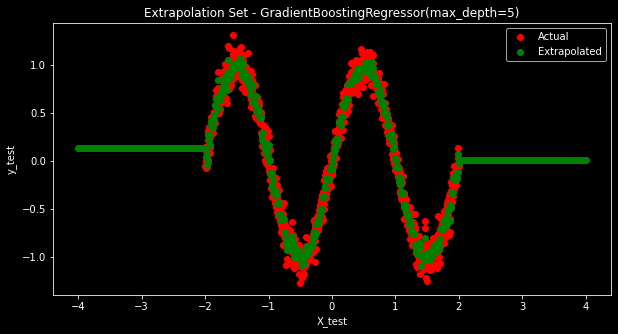


MLPRegressor(hidden_layer_sizes=(30, 20, 10), max_iter=1000, tol=1e-05)
r2_train:   0.97958
r2_test:    0.97442
rmse_train: 0.10301
rmse_test:  0.11281


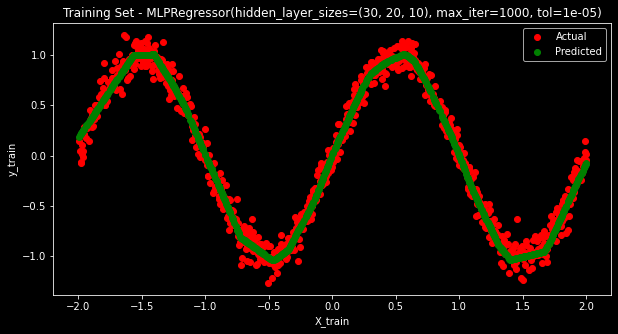

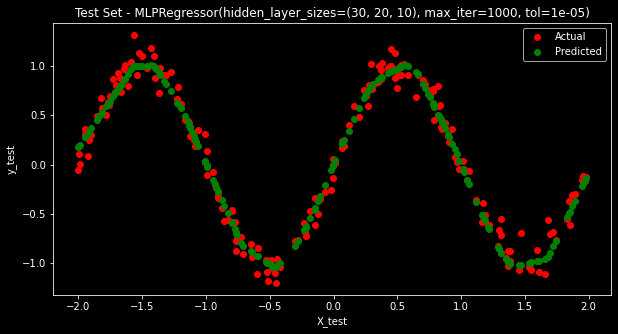

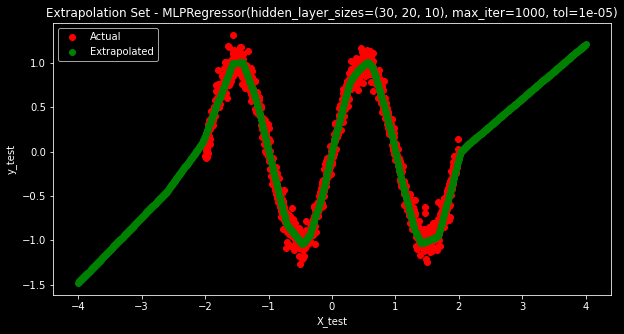

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

for m in models:
    m.fit(X_train, y_train)
    
    y_train_pred = m.predict(X_train)
    y_test_pred  = m.predict(X_test)
    y_ext_pred  = m.predict(x_ext[:,np.newaxis])
    
    print(m)
    
    r2_train = r2_score(y_train, y_train_pred)
    print(f'r2_train:   {r2_train:.5}')

    r2_test = r2_score(y_test, y_test_pred)
    print(f'r2_test:    {r2_test:.5}')
    
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    print(f'rmse_train: {rmse_train:.5}')

    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    print(f'rmse_test:  {rmse_test:.5}')
    
    # Plot training set results
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train, y_train, color='red', label='Actual')
    plt.scatter(X_train, y_train_pred, color='green', label='Predicted')
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title(f'Training Set - {m}')
    plt.legend()
    plt.show()

    # Plot test set results
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='red', label='Actual')
    plt.scatter(X_test, y_test_pred, color='green', label='Predicted')
    plt.xlabel('X_test')
    plt.ylabel('y_test')
    plt.title(f'Test Set - {m}')
    plt.legend()
    plt.show()

    # Plot extrapolation set results
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, color='red', label='Actual')
    plt.scatter(x_ext, y_ext_pred, color='green', label='Extrapolated')
    plt.xlabel('X_test')
    plt.ylabel('y_test')
    plt.title(f'Extrapolation Set - {m}')
    plt.legend()
    plt.show()
    
    print()
# end


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

for m in models:
    print(m)
    
    cv_scores = cross_val_score(m, X, y, cv=kf, scoring='r2')
    cv_scores = pd.DataFrame(cv_scores)
    display(cv_scores.describe().T)
    
    print()
# end
